In [63]:
import pandas as pd
import geopandas as gpd
import requests

# Data Preprocessing

### Read data

In [64]:
token = "vAtl2Z7zE587vSL1K0jPGUqgw"

Download zipcode data

In [65]:
raw_zipcode = gpd.read_file("nyc_zipcodes.shp")
raw_zipcode

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


Download zillow data

In [66]:
raw_zillow = pd.read_csv("zillow_rent_data.csv")
raw_zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1606.206406,...,1994.653463,2027.438438,2042.237444,2049.325559,2016.531345,2023.438976,2031.558202,2046.144009,2053.486247,2055.771355
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1257.814660,...,1749.697900,1738.217986,1747.305840,1758.407295,1758.891075,1762.980879,1771.751591,1779.338402,1795.384582,1799.631140
2,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,NaN,...,1701.217520,1706.900064,1706.067787,1723.722320,1735.484670,1752.132904,1756.990323,1754.429516,1757.602011,1755.031490
3,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1419.480272,1458.063897,1471.726681,1466.734658,1456.175660,1462.478506,1466.267391,1490.237063,1488.180414,1494.366097
4,62093,7,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,2935.808220,2895.699421,2873.209025,2881.906361,2913.546218,2963.964134,3005.735342,3034.413822,3064.476503,3079.585783


Download 311 data with API

In [141]:
# API endpoint URL
url_311 = 'https://data.cityofnewyork.us/resource/erm2-nwe9.json?$limit=100000'

# Set up the headers with the API token
headers = {'X-App-Token': token}

# Make the API request
response = requests.get(url_311, headers=headers)
data = response.json()

# Print the data
raw_311= pd.DataFrame(data)
raw_311.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,intersection_street_1,intersection_street_2,address_type,...,landmark,vehicle_type,closed_date,bridge_highway_name,bridge_highway_segment,taxi_pick_up_location,bridge_highway_direction,due_date,road_ramp,taxi_company_borough
0,59661597,2023-12-07T12:00:00.000,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,FULTON STREET,FULTON STREET,INTERSECTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59661602,2023-12-07T12:00:00.000,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,NaN,NaN,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59657401,2023-12-07T12:00:00.000,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,NaN,NaN,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59657940,2023-12-06T23:57:00.000,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59657008,2023-12-06T23:52:56.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,NaN,NaN,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Download tree data with API

In [142]:
# API endpoint URL
url_tree = 'https://data.cityofnewyork.us/resource/5rq2-4hqu.json'

# Set up the headers with the API token
headers = {'X-App-Token': token}

# Make the API request
response = requests.get(url_tree, headers=headers)
data = response.json()

# Print the data
raw_tree = pd.DataFrame(data)
raw_tree.head()

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,"{'type': 'Point', 'coordinates': [-73.84421521...",3,0,OnCurb,Alive,Fair,Acer rubrum,...,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,1027431.14821,202756.768749
1,09/03/2015,200540,315986,"{'type': 'Point', 'coordinates': [-73.81867945...",21,0,OnCurb,Alive,Fair,Quercus palustris,...,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,1034455.70109,228644.837379
2,09/05/2015,204026,218365,"{'type': 'Point', 'coordinates': [-73.93660770...",3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,1001822.83131,200716.891267
3,09/05/2015,204337,217969,"{'type': 'Point', 'coordinates': [-73.93445615...",10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,...,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,1002420.35833,199244.253136
4,08/30/2015,189565,223043,"{'type': 'Point', 'coordinates': [-73.97597938...",21,0,OnCurb,Alive,Good,Tilia americana,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,990913.775046,182202.425999


### Removing unnecessary columns

In [143]:
columns_to_drop = raw_zipcode.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
gdf_zipcode_1 = raw_zipcode.drop(columns=columns_to_drop)
gdf_zipcode_1.head()

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [144]:
df_zillow_1 = pd.concat([raw_zillow.iloc[:, [2, 6]], raw_zillow.iloc[:, 9:]], axis=1)
df_zillow_1.head()

,RegionName,City,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,77494,Katy,1606.206406,1612.779844,1622.201575,1630.392427,1632.411500,1636.206864,1644.894632,1643.390762,...,1994.653463,2027.438438,2042.237444,2049.325559,2016.531345,2023.438976,2031.558202,2046.144009,2053.486247,2055.771355
1,77449,Katy,1257.814660,1255.268025,1262.170452,1274.955754,1285.526052,1295.665673,1296.650395,1300.868081,...,1749.697900,1738.217986,1747.305840,1758.407295,1758.891075,1762.980879,1771.751591,1779.338402,1795.384582,1799.631140
2,77084,Houston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1701.217520,1706.900064,1706.067787,1723.722320,1735.484670,1752.132904,1756.990323,1754.429516,1757.602011,1755.031490
3,79936,El Paso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1419.480272,1458.063897,1471.726681,1466.734658,1456.175660,1462.478506,1466.267391,1490.237063,1488.180414,1494.366097
4,11385,New York,NaN,2087.527084,NaN,2149.924252,2166.263698,2148.992886,2190.098591,2264.966715,...,2935.808220,2895.699421,2873.209025,2881.906361,2913.546218,2963.964134,3005.735342,3034.413822,3064.476503,3079.585783


In [145]:
df_311_1 = raw_311.loc[:, ['created_date', 'complaint_type', 'incident_zip', "latitude", "longitude"]]
df_311_1.head()

,created_date,complaint_type,incident_zip,latitude,longitude
0,2023-12-07T12:00:00.000,Derelict Vehicles,NaN,NaN,NaN
1,2023-12-07T12:00:00.000,Derelict Vehicles,11412,40.69897994741009,-73.757191809592
2,2023-12-07T12:00:00.000,Derelict Vehicles,10463,40.87875827837968,-73.9062730360959
3,2023-12-06T23:57:00.000,Street Light Condition,11208,40.67826312351959,-73.86688232382159
4,2023-12-06T23:52:56.000,UNSANITARY CONDITION,10029,40.7910071193718,-73.93906875989852


In [146]:
df_tree_1 = raw_tree.loc[:, ["zipcode", "tree_id", "latitude", "longitude", "x_sp", "y_sp", "status", "health", "spc_common"]]
df_tree_1.head()

,zipcode,tree_id,latitude,longitude,x_sp,y_sp,status,health,spc_common
0,11375,180683,40.72309177,-73.84421522,1027431.14821,202756.768749,Alive,Fair,red maple
1,11357,200540,40.79411067,-73.81867946,1034455.70109,228644.837379,Alive,Fair,pin oak
2,11211,204026,40.71758074,-73.9366077,1001822.83131,200716.891267,Alive,Good,honeylocust
3,11211,204337,40.71353749,-73.93445616,1002420.35833,199244.253136,Alive,Good,honeylocust
4,11215,189565,40.66677776,-73.97597938,990913.775046,182202.425999,Alive,Good,American linden


### Remove invalid data points 

Drop duplication

In [147]:
gdf_zipcode_2 = gdf_zipcode_1.drop_duplicates().reset_index(drop=True)
gdf_zipcode_2.head()

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17..."


Drop the rows in df_zillow outsied NYC

In [148]:
index = df_zillow_1[df_zillow_1['City'] != "New York"].index
df_zillow_2 = df_zillow_1.drop(index).reset_index(drop=True)
df_zillow_2 = df_zillow_2.drop(["City"], axis=1)
df_zillow_2.head()

,RegionName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,11385,NaN,2087.527084,NaN,2149.924252,2166.263698,2148.992886,2190.098591,2264.966715,2297.900917,...,2935.808220,2895.699421,2873.209025,2881.906361,2913.546218,2963.964134,3005.735342,3034.413822,3064.476503,3079.585783
1,11208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2508.670432,2588.030194,2613.790654,2585.561351,2633.200754,2672.038493,2806.918757,2765.224364,2737.547470,2728.733333
2,11236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2285.460026,2362.500000
3,10467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2145.642295,2155.617718,2172.346611,2160.962748,2110.533203,2180.323655,2276.372290,2334.204728,2353.686402,2423.888889
4,11373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2199.459063,2255.604528,2262.101623,2271.514956,2250.182334,2231.959479,2257.413993,2247.592851,2302.557354,2292.994444


Change the format of rent dataframe

In [149]:
df_rent_1 = pd.DataFrame(columns=["zipcode", "date", "rent"])
temp_data = []
for index, row in df_zillow_2.iterrows():
    for i in range(len(row)-1):
        temp_data.append({"zipcode": str(int(row[0])), "date": df_zillow_2.columns[i+1], "rent": row[i+1]})
df_rent_1 = pd.concat([df_rent_1, pd.DataFrame(temp_data)], ignore_index=True)
df_rent_1.dropna(subset=['rent'], inplace=True)
df_rent_1 = df_rent_1.reset_index(drop=True)
df_rent_1.head()

,zipcode,date,rent
0,11385,2015-02-28,2087.527084
1,11385,2015-04-30,2149.924252
2,11385,2015-05-31,2166.263698
3,11385,2015-06-30,2148.992886
4,11385,2015-07-31,2190.098591


Drop all rows in df_tree and df_311 with null values.

In [150]:
df_311_1 = df_311_1.dropna()
df_tree_1 = df_tree_1.dropna()

### Normalize column names & column types where needed

Normalize the name of zipcode colunms

In [151]:
df_311_1.rename(columns={'incident_zip': 'zipcode', 'created_date': 'date'}, inplace=True)
df_311_1.head()

,date,complaint_type,zipcode,latitude,longitude
1,2023-12-07T12:00:00.000,Derelict Vehicles,11412,40.69897994741009,-73.757191809592
2,2023-12-07T12:00:00.000,Derelict Vehicles,10463,40.87875827837968,-73.9062730360959
3,2023-12-06T23:57:00.000,Street Light Condition,11208,40.67826312351959,-73.86688232382159
4,2023-12-06T23:52:56.000,UNSANITARY CONDITION,10029,40.7910071193718,-73.93906875989852
5,2023-12-06T23:52:56.000,HEAT/HOT WATER,10003,40.73435111806608,-73.98198731021692


In [152]:
gdf_zipcode_2.rename(columns={'ZIPCODE': 'zipcode', 'geometry': 'location'}, inplace=True)
gdf_zipcode_2 = gdf_zipcode_2.set_geometry('location')
gdf_zipcode_2.head()

,zipcode,location
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [153]:
df_tree_1.rename(columns={'spc_common': 'species'}, inplace=True)
df_tree_1.head()

,zipcode,tree_id,latitude,longitude,x_sp,y_sp,status,health,species
0,11375,180683,40.72309177,-73.84421522,1027431.14821,202756.768749,Alive,Fair,red maple
1,11357,200540,40.79411067,-73.81867946,1034455.70109,228644.837379,Alive,Fair,pin oak
2,11211,204026,40.71758074,-73.9366077,1001822.83131,200716.891267,Alive,Good,honeylocust
3,11211,204337,40.71353749,-73.93445616,1002420.35833,199244.253136,Alive,Good,honeylocust
4,11215,189565,40.66677776,-73.97597938,990913.775046,182202.425999,Alive,Good,American linden


Transform date columns from strings to datetime Python objects


In [154]:
df_311_1['date'] = pd.to_datetime(df_311_1['date'])
print(df_311_1.dtypes) 

date              datetime64[ns]
complaint_type            object
zipcode                   object
latitude                  object
longitude                 object
dtype: object


In [155]:
df_rent_1['date'] = pd.to_datetime(df_rent_1['date'])
print(df_rent_1.dtypes) 

zipcode            object
date       datetime64[ns]
rent              float64
dtype: object


### Normalize the Spatial Reference Identifiers (SRID) of any geometry.

In [156]:
from shapely.geometry import Point

In [157]:
gdf_zipcode_2 = gdf_zipcode_2.to_crs('EPSG:4326')
gdf_zipcode_2.head()

,zipcode,location
0,11436,"POLYGON ((-73.80585 40.68291, -73.80569 40.682..."
1,11213,"POLYGON ((-73.93740 40.67973, -73.93487 40.679..."
2,11212,"POLYGON ((-73.90294 40.67084, -73.90223 40.668..."
3,11225,"POLYGON ((-73.95797 40.67066, -73.95576 40.670..."
4,11218,"POLYGON ((-73.97208 40.65060, -73.97192 40.650..."


In [158]:
print(gdf_zipcode_2.crs)

EPSG:4326


In [159]:
df_tree_1['location'] = [Point(xy) for xy in zip(df_tree_1.longitude, df_tree_1.latitude)]
gdf_tree_1 = gpd.GeoDataFrame(df_tree_1, geometry='location')
gdf_tree_1.crs = 'EPSG:4326'
gdf_tree_1.head()

,zipcode,tree_id,latitude,longitude,x_sp,y_sp,status,health,species,location
0,11375,180683,40.72309177,-73.84421522,1027431.14821,202756.768749,Alive,Fair,red maple,POINT (-73.84422 40.72309)
1,11357,200540,40.79411067,-73.81867946,1034455.70109,228644.837379,Alive,Fair,pin oak,POINT (-73.81868 40.79411)
2,11211,204026,40.71758074,-73.9366077,1001822.83131,200716.891267,Alive,Good,honeylocust,POINT (-73.93661 40.71758)
3,11211,204337,40.71353749,-73.93445616,1002420.35833,199244.253136,Alive,Good,honeylocust,POINT (-73.93446 40.71354)
4,11215,189565,40.66677776,-73.97597938,990913.775046,182202.425999,Alive,Good,American linden,POINT (-73.97598 40.66678)


In [160]:
df_311_1['location'] = [Point(xy) for xy in zip(df_311_1.longitude, df_311_1.latitude)]
gdf_311_1 = gpd.GeoDataFrame(df_311_1, geometry='location')
gdf_311_1.crs = 'EPSG:4326'
gdf_311_1.head()

,date,complaint_type,zipcode,latitude,longitude,location
1,2023-12-07 12:00:00,Derelict Vehicles,11412,40.69897994741009,-73.757191809592,POINT (-73.75719 40.69898)
2,2023-12-07 12:00:00,Derelict Vehicles,10463,40.87875827837968,-73.9062730360959,POINT (-73.90627 40.87876)
3,2023-12-06 23:57:00,Street Light Condition,11208,40.67826312351959,-73.86688232382159,POINT (-73.86688 40.67826)
4,2023-12-06 23:52:56,UNSANITARY CONDITION,10029,40.7910071193718,-73.93906875989852,POINT (-73.93907 40.79101)
5,2023-12-06 23:52:56,HEAT/HOT WATER,10003,40.73435111806608,-73.98198731021692,POINT (-73.98199 40.73435)


# Storing Data

## Create database

In [161]:
!createdb group36project

createdb: error: database creation failed: ERROR:  database "group36project" already exists


In [162]:
!psql --dbname group36project -c 'CREATE EXTENSION postgis;'

ERROR:  extension "postgis" already exists


## Create a schema.sql file that defines each table’s schema.

In [200]:
from sqlalchemy import create_engine
from geoalchemy2 import Geometry, WKTElement
engine = create_engine('postgresql:///group36project')
conn = engine.connect()
conn.execute("CREATE EXTENSION IF NOT EXISTS postgis;")

In [201]:
# Get the data types of each column
dtypes = gdf_zipcode_2.dtypes

# Create a mapping from pandas data types to SQL data types
type_mapping = {
    'int64': 'INTEGER',
    'float64': 'REAL',
    'datetime64[ns]': 'TIMESTAMP',
    'object': 'TEXT',
    'geometry':'geometry(POLYGON,4326)' 
}

# Generate SQL definitions for each column
definitions = []
for column, dtype in dtypes.iteritems():
    sql_type = type_mapping[str(dtype)]
    definitions.append(f'    {column} {sql_type}')

# Generate and print the full CREATE TABLE statement
table_name = 'zipcodes'
sql_zipcode = f'CREATE TABLE IF NOT EXISTS {table_name} (\n    id INTEGER PRIMARY KEY'+',\n'+ ',\n'.join(definitions) + '\n);'

/var/folders/78/mzvhkg9541qgk1th67dnww8m0000gn/T/ipykernel_44103/101136632.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in dtypes.iteritems():


In [202]:
# Get the data types of each column
dtypes = gdf_311_1.dtypes

# Create a mapping from pandas data types to SQL data types
type_mapping = {
    'int64': 'INTEGER',
    'float64': 'REAL',
    'datetime64[ns]': 'TIMESTAMP',
    'object': 'TEXT',
    'geometry':'geometry(POINT,4326)' 
}

# Generate SQL definitions for each column
definitions = []
for column, dtype in dtypes.iteritems():
    sql_type = type_mapping[str(dtype)]
    definitions.append(f'    {column} {sql_type}')

# Generate and print the full CREATE TABLE statement
table_name = 'complaints'
sql_311 = f'CREATE TABLE IF NOT EXISTS {table_name} (\n    id INTEGER PRIMARY KEY'+',\n'+ ',\n'.join(definitions) + '\n);'

/var/folders/78/mzvhkg9541qgk1th67dnww8m0000gn/T/ipykernel_44103/597809228.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in dtypes.iteritems():


In [203]:
# Get the data types of each column
dtypes = gdf_tree_1.dtypes

# Create a mapping from pandas data types to SQL data types
type_mapping = {
    'int64': 'INTEGER',
    'float64': 'REAL',
    'datetime64[ns]': 'TIMESTAMP',
    'object': 'TEXT',
    'geometry':'geometry(POINT,4326)' 
}

# Generate SQL definitions for each column
definitions = []
for column, dtype in dtypes.iteritems():
    sql_type = type_mapping[str(dtype)]
    definitions.append(f'    {column} {sql_type}')

# Generate and print the full CREATE TABLE statement
table_name = 'trees'
sql_tree = f'CREATE TABLE IF NOT EXISTS {table_name} (\n    id INTEGER PRIMARY KEY'+',\n'+ ',\n'.join(definitions) + '\n);'

/var/folders/78/mzvhkg9541qgk1th67dnww8m0000gn/T/ipykernel_44103/1637391997.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in dtypes.iteritems():


In [204]:
# Get the data types of each column
dtypes = df_rent_1.dtypes

# Create a mapping from pandas data types to SQL data types
type_mapping = {
    'int64': 'INTEGER',
    'float64': 'REAL',
    'datetime64[ns]': 'TIMESTAMP',
    'object': 'TEXT',
}

# Generate SQL definitions for each column
definitions = []
for column, dtype in dtypes.iteritems():
    sql_type = type_mapping[str(dtype)]
    definitions.append(f'    {column} {sql_type}')

# Generate and print the full CREATE TABLE statement
table_name = 'rents'
sql_zillow = f'CREATE TABLE IF NOT EXISTS {table_name} (\n    id INTEGER PRIMARY KEY'+',\n'+ ',\n'.join(definitions) + '\n);'

/var/folders/78/mzvhkg9541qgk1th67dnww8m0000gn/T/ipykernel_44103/1354330607.py:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in dtypes.iteritems():


In [205]:
# Write to 'schema.sql' file
with open('schema.sql', 'w') as f:
    f.write(sql_zipcode)
    f.write(sql_311)
    f.write(sql_tree)
    f.write(sql_zillow)

In [206]:
with open('schema.sql') as f:
    with engine.connect() as connection:
        connection.execute(f.read())

## Add data to database

In [212]:
gdf_311_1.to_postgis("complaints", engine, if_exists='append', index=False, index_label='id')

UniqueViolation: duplicate key value violates unique constraint "complaints_pkey"
DETAIL:  Key (id)=(1) already exists.
CONTEXT:  COPY complaints, line 1


In [208]:
gdf_tree_1.to_postgis("trees", engine, if_exists='append', index=False, index_label='id')

In [209]:
gdf_zipcode_2.to_postgis("zipcodes", engine, if_exists='append', index=False, index_label='id')

In [210]:
df_rent_1.to_sql("rents", engine, if_exists='append', index=False, index_label='id')

39

In [211]:
query = """
SELECT f_geometry_column, coord_dimension, srid, type 
FROM geometry_columns 
WHERE f_table_name = 'trees'
"""
df = pd.read_sql_query(query, engine)
print(df)

  f_geometry_column  coord_dimension  srid   type
0          location                2  4326  POINT


# Understanding Data

In [213]:
from sqlalchemy import text
def write_query_to_file(query, outfile):
    with open(outfile, 'w') as f:
        f.write(query)

### Query 1

In [214]:
QUERY_1_FILENAME = "Query 1"

In [215]:
# Define your SQL query
QUERY_1 = """
SELECT zipcode, COUNT(*) AS complaints_count
FROM complaints
WHERE date BETWEEN '2023-12-04 00:00:00' AND '2023-12-07 00:00:00'
GROUP BY zipcode
ORDER BY complaints_count DESC;
"""

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(QUERY_1, engine)

# Display the DataFrame
print(df)

    zipcode  complaints_count
0     10025               623
1     11201               589
2     10458               498
3     11226               497
4     10456               480
..      ...               ...
194   12345                 1
195   10110                 1
196   10171                 1
197   11242                 1
198   10151                 1

[199 rows x 2 columns]


In [216]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_1))
    for row in result:
        print(row)

('10025', 623)
('11201', 589)
('10458', 498)
('11226', 497)
('10456', 480)
('10467', 460)
('11238', 451)
('10468', 450)
('10003', 447)
('10457', 431)
('11207', 395)
('11373', 366)
('11208', 363)
('11385', 356)
('10452', 327)
('10027', 326)
('11215', 325)
('11233', 304)
('10019', 293)
('10462', 292)
('11221', 289)
('10466', 288)
('10453', 287)
('10031', 284)
('11218', 284)
('11101', 280)
('11212', 274)
('10026', 271)
('11209', 267)
('10463', 267)
('11213', 265)
('11229', 260)
('11235', 258)
('11214', 258)
('11230', 257)
('10028', 253)
('10033', 248)
('10032', 244)
('11220', 241)
('10128', 239)
('10460', 239)
('11377', 239)
('10451', 238)
('11223', 237)
('11231', 235)
('10016', 234)
('11225', 233)
('10459', 232)
('11222', 232)
('10011', 229)
('10461', 227)
('10023', 225)
('11217', 224)
('11216', 220)
('10034', 216)
('11210', 214)
('11372', 214)
('11219', 210)
('11211', 210)
('11357', 210)
('10024', 209)
('10472', 204)
('11432', 203)
('10002', 203)
('10036', 202)
('11366', 202)
('11234', 

In [217]:
write_query_to_file(QUERY_1, QUERY_1_FILENAME)

### Query 2

In [218]:
QUERY_2_FILENAME = "Query 2"

In [219]:
# Define your SQL query
QUERY_2 = """
SELECT zipcode, COUNT(*) AS trees_count
FROM trees
GROUP BY zipcode
ORDER BY trees_count DESC
LIMIT 10;
"""

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(QUERY_2, engine)

# Display the DataFrame
print(df)

  zipcode  trees_count
0   11375           36
1   11215           35
2   10023           33
3   11105           33
4   11205           30
5   10457           30
6   11226           28
7   10306           27
8   11230           24
9   10024           21


In [220]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_2))
    for row in result:
        print(row)

('11375', 36)
('11215', 35)
('10023', 33)
('11105', 33)
('11205', 30)
('10457', 30)
('11226', 28)
('10306', 27)
('11230', 24)
('10024', 21)


In [221]:
write_query_to_file(QUERY_2, QUERY_2_FILENAME)

### Query3

In [222]:
QUERY_3_FILENAME = "Query 3"

In [223]:
QUERY_3 = """
SELECT trees_count.zipcode, CAST(ROUND(CAST(rents.rent AS numeric), 2) AS DECIMAL(10,2)) AS average_rent
FROM (
    SELECT zipcode, COUNT(*) AS trees_count
    FROM trees
    GROUP BY zipcode
    ORDER BY trees_count DESC
    LIMIT 10
) AS trees_count
JOIN rents ON trees_count.zipcode = rents.zipcode
WHERE rents.date = '2023-08-31'
ORDER BY trees_count.trees_count DESC;
"""

df = pd.read_sql_query(QUERY_3, engine)

df['average_rent'] = df['average_rent'].apply(lambda x: "{:,.2f}".format(x))

print(df)

  zipcode average_rent
0   11375     2,743.40
1   11215     3,575.65
2   10023     4,370.07
3   11105     2,852.73
4   10457     2,183.97
5   11205     3,497.47
6   11226     2,785.32
7   10306     2,331.54
8   11230     2,657.04
9   10024     3,797.94


In [224]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_3))
    for row in result:
        print(row)

('11375', Decimal('2743.40'))
('11215', Decimal('3575.65'))
('10023', Decimal('4370.07'))
('11105', Decimal('2852.73'))
('10457', Decimal('2183.97'))
('11205', Decimal('3497.47'))
('11226', Decimal('2785.32'))
('10306', Decimal('2331.54'))
('11230', Decimal('2657.04'))
('10024', Decimal('3797.94'))


In [225]:
write_query_to_file(QUERY_3, QUERY_3_FILENAME)

### Query4

In [226]:
QUERY_4_FILENAME = "Query 4"

In [227]:
QUERY_4 = """
(SELECT h_rent.zipcode, h_rent.rent, trees_count.trees_count, complaints_count.complaints_count 
FROM (
    SELECT zipcode, rent 
    FROM rents
    WHERE date = '2023-01-31'
    ORDER BY rent DESC
    LIMIT 5
) AS h_rent
JOIN  (
    SELECT zipcode, COUNT(*) AS trees_count
    FROM trees
    GROUP BY zipcode
) AS trees_count ON h_rent.zipcode = trees_count.zipcode
JOIN (
    SELECT zipcode, COUNT(*) AS complaints_count
    FROM complaints
    WHERE date BETWEEN '2023-12-04 00:00:00' AND '2023-12-07 23:59:59'
    GROUP BY zipcode
) AS complaints_count ON h_rent.zipcode = complaints_count.zipcode)
UNION ALL
(SELECT l_rent.zipcode, l_rent.rent, trees_count.trees_count, complaints_count.complaints_count 
FROM (
    SELECT zipcode, rent 
    FROM rents
    WHERE date = '2023-01-31'
    ORDER BY rent ASC
    LIMIT 5
) AS l_rent
JOIN  (
    SELECT zipcode, COUNT(*) AS trees_count
    FROM trees
    GROUP BY zipcode
) AS trees_count ON l_rent.zipcode = trees_count.zipcode
JOIN (
    SELECT zipcode, COUNT(*) AS complaints_count
    FROM complaints
    WHERE date BETWEEN '2023-12-04 00:00:00' AND '2023-12-07 23:59:59'
    GROUP BY zipcode
) AS complaints_count ON l_rent.zipcode = complaints_count.zipcode)
"""

df = pd.read_sql_query(QUERY_4, engine)
# Display the DataFrame
print(df)

  zipcode       rent  trees_count  complaints_count
0   10013  5480.1064            1               150
1   10011  4741.8670            4               229
2   10458  1883.0758           21               498
3   10453  1820.2341            4               287
4   10309  1380.5143            4                49
5   11357  1829.6633            2               210


In [228]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_4))
    for row in result:
        print(row)

('10013', 5480.1064, 1, 150)
('10011', 4741.867, 4, 229)
('10458', 1883.0758, 21, 498)
('10453', 1820.2341, 4, 287)
('10309', 1380.5143, 4, 49)
('11357', 1829.6633, 2, 210)


In [229]:
write_query_to_file(QUERY_4, QUERY_4_FILENAME)

### Query5

In [230]:
QUERY_5_FILENAME = "Query 5"

In [231]:
QUERY_5 = """
SELECT zipcodes.zipcode, COUNT(*) AS trees_count
FROM trees
JOIN zipcodes ON ST_Within(trees.location, zipcodes.location)
GROUP BY zipcodes.zipcode
ORDER BY trees_count DESC
LIMIT 10
"""

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(QUERY_5, engine)

# Display the DataFrame
print(df)

  zipcode  trees_count
0   11375           36
1   11215           35
2   10023           33
3   11105           33
4   11205           30
5   10457           30
6   11226           28
7   10306           27
8   11230           24
9   10024           21


In [232]:
with engine.connect() as conn:
    result = conn.execute(text(QUERY_5))
    for row in result:
        print(row)

('11375', 36)
('11215', 35)
('10023', 33)
('11105', 33)
('11205', 30)
('10457', 30)
('11226', 28)
('10306', 27)
('11230', 24)
('10024', 21)


In [233]:
write_query_to_file(QUERY_5, QUERY_5_FILENAME)

### Query6

In [234]:
QUERY_6_FILENAME = "Query 6"

In [235]:
target_point = "POINT(40.80737875669467 -73.96253174434912)"

In [236]:
target_point = "POINT(-73.96253174434912 40.80737875669467)"
QUERY_6 = f"""
SELECT tree_id AS id, species, health, status, ST_AsText(location) AS location 
FROM trees 
WHERE ST_DWithin(ST_Transform(location, 4326)::geography, ST_GeomFromText('{target_point}', 4326)::geography, 804.672);
"""

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(QUERY_6, engine)

# Display the DataFrame
print(df)

        id           species health status                         location
0   198514           pin oak   Good  Alive   POINT(-73.9620798 40.80230109)
1   209919  London planetree   Good  Alive  POINT(-73.96331506 40.80881155)
2   209921  London planetree   Good  Alive  POINT(-73.96340334 40.80874458)
3   203887        willow oak   Good  Alive  POINT(-73.96071917 40.80572583)
4   196440      American elm   Fair  Alive  POINT(-73.96412322 40.81114538)
5   209913           pin oak   Good  Alive  POINT(-73.96312072 40.80907709)
6   178550      Norway maple   Good  Alive  POINT(-73.95739877 40.80690345)
7   189403      Callery pear   Fair  Alive  POINT(-73.95861206 40.80754134)
8   196606       honeylocust   Good  Alive  POINT(-73.96719944 40.80732247)
9   198512           pin oak   Good  Alive  POINT(-73.96230577 40.80239611)
10  196541       honeylocust   Good  Alive   POINT(-73.9654983 40.80929314)
11  203996      Callery pear   Good  Alive  POINT(-73.96134249 40.80528416)
12  189414  

In [237]:
write_query_to_file(QUERY_6, QUERY_6_FILENAME)

# Visualizing Data

Visualization 1

In [244]:
query_visual_1 = """
WITH TopComplaintTypes AS (
    SELECT complaint_type, COUNT(*) AS complaint_count
    FROM complaints
    WHERE date BETWEEN '2023-11-04 00:00:00' AND '2023-12-07 23:59:59'
    GROUP BY complaint_type
    ORDER BY complaint_count DESC
    LIMIT 3
)

SELECT DATE_TRUNC('day', date::timestamp) AS truncated_date,
       complaint_type,
       COUNT(*) AS complaint_count
FROM complaints
WHERE complaint_type IN (SELECT complaint_type FROM TopComplaintTypes)
      AND date BETWEEN '2023-11-04 00:00:00' AND '2023-12-07 23:59:59'
GROUP BY truncated_date, complaint_type
ORDER BY truncated_date, complaint_count DESC;


"""

# Execute the query using pandas
df = pd.read_sql_query(query_visual_1, engine)
print(df)

   truncated_date       complaint_type  complaint_count
0      2023-11-26      Illegal Parking              134
1      2023-11-26       HEAT/HOT WATER              115
2      2023-11-26  Noise - Residential              114
3      2023-11-27      Illegal Parking             1494
4      2023-11-27       HEAT/HOT WATER             1478
5      2023-11-27  Noise - Residential              552
6      2023-11-28       HEAT/HOT WATER             2874
7      2023-11-28      Illegal Parking             1475
8      2023-11-28  Noise - Residential              577
9      2023-11-29       HEAT/HOT WATER             2907
10     2023-11-29      Illegal Parking             1323
11     2023-11-29  Noise - Residential              588
12     2023-11-30      Illegal Parking             1677
13     2023-11-30       HEAT/HOT WATER             1627
14     2023-11-30  Noise - Residential              549
15     2023-12-01      Illegal Parking             1455
16     2023-12-01       HEAT/HOT WATER          

In [245]:
df_complaint_type = df.drop_duplicates(subset = 'complaint_type')["complaint_type"]
df_complaint_type

0        Illegal Parking
1         HEAT/HOT WATER
2    Noise - Residential
Name: complaint_type, dtype: object

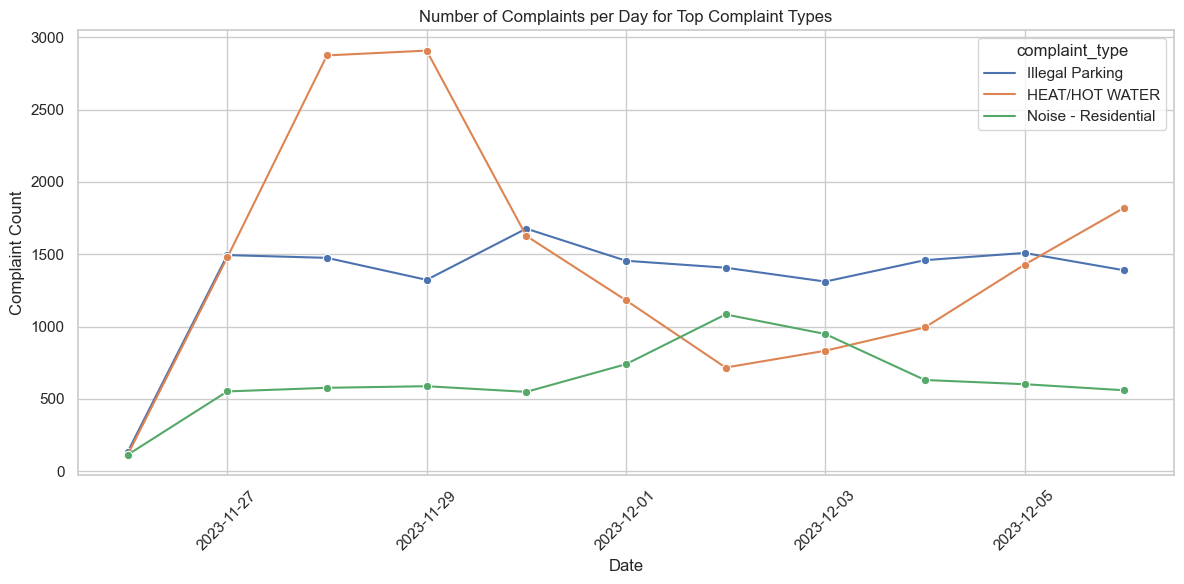

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'truncated_date' to datetime for proper plotting
df['truncated_date'] = pd.to_datetime(top_complaint_types['truncated_date'])

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='truncated_date', y='complaint_count', hue='complaint_type', data=df, marker='o')
plt.title('Number of Complaints per Day for Top Complaint Types')
plt.xlabel('Date')
plt.ylabel('Complaint Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

Visualization 2